# Predict Outcomes for Demo
M.J. Madsen
2017-07-06

Using outcome model data generated by `\src\Generate_Outcome_History.ipynb`

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
%matplotlib inline

In [29]:
outcomes_df = pd.read_csv("../data/train_outcomes.csv")

print(outcomes_df.shape)
outcomes_df.head()

(100000, 23)


,clientID,resourceID,outcome,Cond_0,Cond_1,Cond_2,Cond_3,Cond_4,Cond_5,Cond_6,...,Cond_10,Cond_11,Cond_12,Cond_13,Cond_14,Cond_15,Cond_16,Cond_17,Cond_18,Cond_19
0,2,2,0,0.00,0.17,0.00,0.00,0.00,0.00,0.0,...,0.17,0.0,0.20,0.00,0.00,0.00,0.00,0.77,0.0,0.07
1,2,4,0,0.00,0.53,0.29,0.00,0.11,0.00,0.0,...,0.00,0.0,0.11,0.49,0.25,0.49,0.00,0.00,0.0,0.00
2,4,9,0,0.18,0.56,0.00,0.02,0.00,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.48,0.00,0.0,0.00
3,4,5,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.37,0.0,0.00
4,5,4,0,0.39,0.06,0.00,0.00,0.00,0.18,0.0,...,0.22,0.0,0.00,0.23,0.15,0.00,0.00,0.00,0.0,0.42


Move both clientID and ResourceID to dummy columns

In [30]:
outcomes_df['clientID']  = outcomes_df['clientID'].astype('category')
outcomes_df['resourceID']  = outcomes_df['resourceID'].astype('category')

outcomes_dum= pd.get_dummies(outcomes_df)
outcomes_dum.head()

,outcome,Cond_0,Cond_1,Cond_2,Cond_3,Cond_4,Cond_5,Cond_6,Cond_7,Cond_8,...,resourceID_10,resourceID_11,resourceID_12,resourceID_13,resourceID_14,resourceID_15,resourceID_16,resourceID_17,resourceID_18,resourceID_19
0,0,0.00,0.17,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
1,0,0.00,0.53,0.29,0.00,0.11,0.00,0.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
2,0,0.18,0.56,0.00,0.02,0.00,0.00,0.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
3,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
4,0,0.39,0.06,0.00,0.00,0.00,0.18,0.0,0.0,0.11,...,0,0,0,0,0,0,0,0,0,0


# Visualize the Data

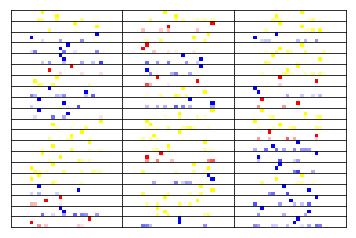

In [35]:
nrow = 20
ncol = 3
fig, axes = plt.subplots(nrow, ncol, sharex='all', sharey='all')
fig.subplots_adjust(hspace = .001, wspace=.001)

picks = np.random.choice(range(len(outcomes_dum)),size=[nrow,ncol])
n_bin = 100
cmap_name = 'mylist'

endcolor = [(1,0,0),(0,0,1),(1,1,0)]

from matplotlib.colors import LinearSegmentedColormap
for i in range(nrow):
    for j in range(ncol):
        colors = [(1, 1, 1),endcolor[int(np.array(outcomes_dum)[picks[i,j],0])+1]]  # W -> R
        cm = LinearSegmentedColormap.from_list(
                    cmap_name, colors, N=n_bin)
        
        axes[i,j].pcolor(np.array(outcomes_dum)[picks[i,j],1:].reshape(3,20),cmap=cm)
        axes[i,j].set_aspect(1)
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].grid('off')
        axes[i,j].set_xlim(-1,21)
        axes[i,j].set_ylim(0,3)
plt.savefig("../docs/sample_interaction_data.png",dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


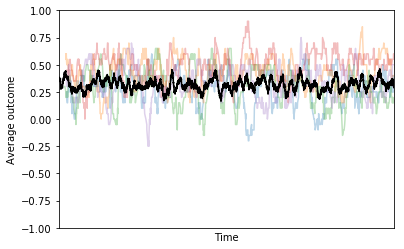

In [82]:
outcome_rollmean_small = (outcomes_df['outcome'].rolling(200).mean())
priorpoints = 20000
np.random.seed(23)

for k in np.random.choice(range(20),5,replace=False):
    outcomes_sub = outcomes_df[-priorpoints:][outcomes_df['clientID']==k]['outcome'].rolling(20).mean()
    plt.plot(np.array(outcomes_sub.index.values)-(len(outcomes_df)-priorpoints),outcomes_sub.values[-priorpoints:],alpha=0.3)
plt.plot(np.arange(priorpoints),outcome_rollmean_small.values[-priorpoints:],label="Historical Outcomes",color='k')
plt.xlim(0,priorpoints)
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Average outcome')
plt.ylim(-1,1)

plt.savefig("../docs/client_sample_history.png",dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


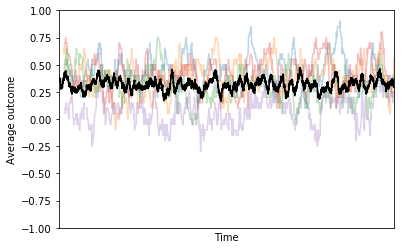

In [83]:
outcome_rollmean_small = (outcomes_df['outcome'].rolling(200).mean())
priorpoints = 20000


for k in range(5):
    outcomes_sub = outcomes_df[-priorpoints:][outcomes_df['resourceID']==k]['outcome'].rolling(20).mean()
    plt.plot(np.array(outcomes_sub.index.values)-(len(outcomes_df)-priorpoints),outcomes_sub.values[-priorpoints:],alpha=0.3)
plt.plot(np.arange(priorpoints),outcome_rollmean_small.values[-priorpoints:],label="Historical Outcomes",color='k')
plt.xlim(0,priorpoints)
plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Average outcome')
plt.ylim(-1,1)
plt.savefig("../docs/resource_sample_history.png",dpi=300)

## Train/Test split

Run the test/train split and Turn dataframes into arrays

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(outcomes_dum.drop(['outcome'], axis=1),
                                                    outcomes_dum['outcome'], test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) + 1
y_test = np.array(y_test) + 1

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest= xgb.DMatrix(X_test,label=y_test)

In [ ]:
watchlist  = [(dtest,'eval'), (dtrain,'train')]
param = {'max_depth':10, 'eta':0.3, 'silent':1, 'gamma':5,'objective':'multi:softprob','num_class':3 }
num_round = 50
bst = xgb.train(param, dtrain, num_round,watchlist)


In [ ]:
preds = bst.predict(dtest)
predictions = np.argmax(preds,axis=1)
cnf_matrix = confusion_matrix(y_test, predictions)
print(cnf_matrix)


The model works fairly well. We have a decent confusion matrix with about 83% accuracy.

# Recommendations

Now we can train the full model and compare the with-and-without predictions options


In [ ]:
full_features = xgb.DMatrix(outcomes_dum.drop(['outcome'], axis=1), label=np.array(outcomes_dum['outcome'])+1)

num_round = 100
bstfull = xgb.train(param, full_features, num_round)

bstfull.save_model('../model/xgbfull.model')

# Load Previously Trained Model

In [3]:
bstfull = xgb.Booster() #init model
bstfull.load_model("../model/xgbfull.model") # load data

In [4]:
testing_df = pd.read_csv("../data/test_outcomes.csv")

print(testing_df.shape)
testing_df.head()

(50000, 24)


,interactionID,clientID,resourceID,outcome,Cond_0,Cond_1,Cond_2,Cond_3,Cond_4,Cond_5,...,Cond_10,Cond_11,Cond_12,Cond_13,Cond_14,Cond_15,Cond_16,Cond_17,Cond_18,Cond_19
0,0,15,17,0,0.0,0.0,0.12,0.0,0.0,0.0,...,0.12,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,15,7,0,0.0,0.0,0.12,0.0,0.0,0.0,...,0.12,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,15,15,0,0.0,0.0,0.12,0.0,0.0,0.0,...,0.12,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,15,6,1,0.0,0.0,0.12,0.0,0.0,0.0,...,0.12,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,15,13,0,0.0,0.0,0.12,0.0,0.0,0.0,...,0.12,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
testing_df['clientID']  = testing_df['clientID'].astype('category')
testing_df['resourceID']  = testing_df['resourceID'].astype('category')
print(testing_df['clientID'].cat.categories )
print(testing_df['resourceID'].cat.categories )

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')


In [6]:
testing_dum= pd.get_dummies(testing_df)
testing_dum.head()

,interactionID,outcome,Cond_0,Cond_1,Cond_2,Cond_3,Cond_4,Cond_5,Cond_6,Cond_7,...,resourceID_10,resourceID_11,resourceID_12,resourceID_13,resourceID_14,resourceID_15,resourceID_16,resourceID_17,resourceID_18,resourceID_19
0,0,0,0.0,0.0,0.12,0.0,0.0,0.0,0.15,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0.0,0.0,0.12,0.0,0.0,0.0,0.15,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.0,0.0,0.12,0.0,0.0,0.0,0.15,0.0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0.0,0.0,0.12,0.0,0.0,0.0,0.15,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.0,0.0,0.12,0.0,0.0,0.0,0.15,0.0,...,0,0,0,1,0,0,0,0,0,0


## Get Predictions
Run the prediction for every combination of clients and resources

In [7]:
full_test = xgb.DMatrix(testing_dum.drop(['outcome','interactionID'], axis=1), label=np.array(testing_dum['outcome'])+1)
pred = bstfull.predict(full_test)

In [8]:
predictions = np.argmax(pred,axis=1)
cnf_matrix = confusion_matrix(np.array(testing_dum['outcome'])+1, predictions)
print(cnf_matrix)

[[ 2162  2948    15]
 [  631 21572  1892]
 [  172  1794 18814]]


Calculate the overall "score" for each potential outcome:
> `-1 * prediction(-1) + prediction(1)`

In [9]:
score = -1*pred[:,0] + pred[:,2]
testing_df['score'] = score

In [11]:
tgroups = testing_df.groupby('interactionID')
best_df = testing_df[['interactionID','clientID','resourceID','outcome']].loc[range(0,len(testing_df),5)].copy()
best_df['BestPrediction'] = 0
best_df.reset_index(inplace=True)
for gname, group in tgroups:
    bestrow = group['score'].argmax()
    best_df['BestPrediction'][gname]= (group['score'].ix[bestrow])
    best_df['outcome'][gname] = (group['outcome'].ix[bestrow])
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
best_df.head()

,index,interactionID,clientID,resourceID,outcome,BestPrediction
0,0,0,15,17,1,0
1,5,1,9,8,1,0
2,10,2,10,13,1,0
3,15,3,6,19,1,0
4,20,4,17,11,1,0


 This is a huge improvement! Not surprising given that we are intentionally putting the best resource forward, but it is kind of surprising how big the improvment is.
 
 ## Visualize the improvement

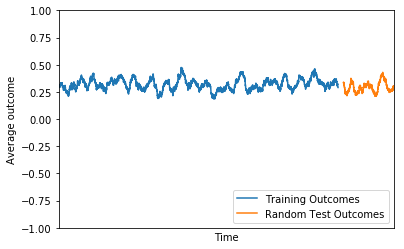

In [22]:
test_outcomes = len(testing_df)
test_rollmean = testing_df['outcome'].loc[range(0,test_outcomes,5)].rolling(200).mean()
outcome_rollmean_small = (outcomes_df['outcome'].rolling(200).mean())

priorpoints = 10000
plt.plot(np.arange(priorpoints),outcome_rollmean_small.values[-priorpoints:],label="Training Outcomes")
plt.plot(np.arange(len(test_rollmean))+priorpoints,test_rollmean.values,label="Random Test Outcomes")
plt.xticks([])
plt.xlim(0,priorpoints + 2000)
plt.xlabel('Time')
plt.ylabel('Average outcome')
plt.ylim(-1,1)
plt.legend(loc='lower right')


plt.show()

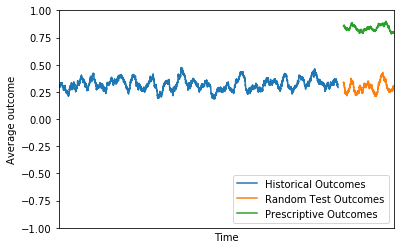

In [26]:
test_outcomes = len(testing_df)
test_rollmean = testing_df['outcome'].loc[range(0,test_outcomes,5)].rolling(200).mean()
outcome_rollmean_small = (outcomes_df['outcome'].rolling(200).mean())

best_df_rollmean = best_df['outcome'].rolling(200).mean()

priorpoints = 10000
plt.plot(np.arange(priorpoints),outcome_rollmean_small.values[-priorpoints:],label="Historical Outcomes")
plt.plot(np.arange(len(test_rollmean))+priorpoints,test_rollmean.values,label="Random Test Outcomes")
plt.plot(np.arange(len(test_rollmean))+priorpoints,best_df_rollmean.values,label="Prescriptive Outcomes")
plt.xticks([])
plt.xlim(0,priorpoints + 2000)
plt.xlabel('Time')
plt.ylabel('Average outcome')
plt.ylim(-1,1)
plt.legend(loc='lower right')
plt.savefig("../docs/train_test_best_rolling_average.png",dpi=300)
plt.show()
